In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_valid,X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [ ]:
model = keras.model.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='relu'))

In [7]:
model.summary()
model.layers
hidden1 = model.layers[1]
hidden1.name

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


'dense'

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [9]:
test_fit = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7267 - accuracy: 0.7644 - val_loss: 0.5006 - val_accuracy: 0.8328
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4886 - accuracy: 0.8291 - val_loss: 0.4342 - val_accuracy: 0.8540
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4422 - accuracy: 0.8445 - val_loss: 0.4176 - val_accuracy: 0.8512
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4146 - accuracy: 0.8538 - val_loss: 0.4188 - val_accuracy: 0.8596
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3949 - accuracy: 0.8605 - val_loss: 0.3861 - val_accuracy: 0.8704
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3801 - accuracy: 0.8657 - val_loss: 0.3889 - val_accuracy: 0.8634
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3659 - accuracy: 0.8707 - val_loss: 0.3691 - val_accuracy:

In [12]:
y_pred = model.predict(X_test)
print(y_train)

[4 0 7 ... 3 0 5]


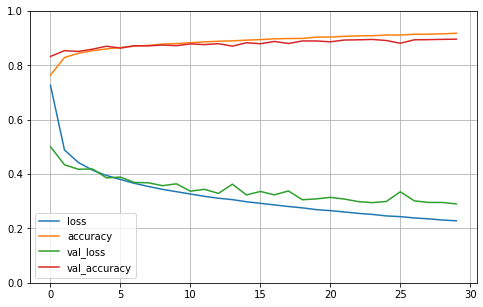

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(test_fit.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()